In [70]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


**IMPORTS AND READING DATA**





In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics


In [ ]:
customer_data = pd.read_csv("/gdrive/MyDrive/Customer Conversion Prediction/Customer Conversion Prediction 1.csv")



**DATA UNDERSTANDING**

In [ ]:

customer_data.shape

(45211, 11)

In [ ]:
customer_data.head(10)

age           job   marital education_qual call_type  day  mon  dur  \
0   58    management   married       tertiary   unknown    5  may  261   
1   44    technician    single      secondary   unknown    5  may  151   
2   33  entrepreneur   married      secondary   unknown    5  may   76   
3   47   blue-collar   married        unknown   unknown    5  may   92   
4   33       unknown    single        unknown   unknown    5  may  198   
5   35    management   married       tertiary   unknown    5  may  139   
6   28    management    single       tertiary   unknown    5  may  217   
7   42  entrepreneur  divorced       tertiary   unknown    5  may  380   
8   58       retired   married        primary   unknown    5  may   50   
9   43    technician    single      secondary   unknown    5  may   55   

   num_calls prev_outcome   y  
0          1      unknown  no  
1          1      unknown  no  
2          1      unknown  no  
3          1      unknown  no  
4          1      unknown  no  
5          1      unknown  no  
6          1      unknown  no  
7          1      unknown  no  
8          1      unknown  no  
9          1      unknown  no

In [ ]:
customer_data.tail(10)

age           job   marital education_qual  call_type  day  mon   dur  \
45201   53    management   married       tertiary   cellular   17  nov   226   
45202   34        admin.    single      secondary   cellular   17  nov   224   
45203   23       student    single       tertiary   cellular   17  nov   266   
45204   73       retired   married      secondary   cellular   17  nov   300   
45205   25    technician    single      secondary   cellular   17  nov   386   
45206   51    technician   married       tertiary   cellular   17  nov   977   
45207   71       retired  divorced        primary   cellular   17  nov   456   
45208   72       retired   married      secondary   cellular   17  nov  1127   
45209   57   blue-collar   married      secondary  telephone   17  nov   508   
45210   37  entrepreneur   married      secondary   cellular   17  nov   361   

       num_calls prev_outcome    y  
45201          1      success  yes  
45202          1      unknown  yes  
45203          1      unknown  yes  
45204          1      failure  yes  
45205          2      unknown  yes  
45206          3      unknown  yes  
45207          2      unknown  yes  
45208          5      success  yes  
45209          4      unknown   no  
45210          2        other   no

In [ ]:
customer_data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
customer_data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
customer_data.nunique()

age                 77
job                 12
marital              3
education_qual       4
call_type            3
day                 31
mon                 12
dur               1573
num_calls           48
prev_outcome         4
y                    2
dtype: int64

In [ ]:
customer_data["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
customer_data.describe()

age           day           dur     num_calls
count  45211.000000  45211.000000  45211.000000  45211.000000
mean      40.936210     15.806419    258.163080      2.763841
std       10.618762      8.322476    257.527812      3.098021
min       18.000000      1.000000      0.000000      1.000000
25%       33.000000      8.000000    103.000000      1.000000
50%       39.000000     16.000000    180.000000      2.000000
75%       48.000000     21.000000    319.000000      3.000000
max       95.000000     31.000000   4918.000000     63.000000

**DATA PREPERATION**

In [ ]:
customer_data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

**CLEANING THE DATA**

In [ ]:
customer_data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
student = customer_data.drop(['job','education_qual'], axis =1)
student.head()

age  marital call_type  day  mon  dur  num_calls prev_outcome   y
0   58  married   unknown    5  may  261          1      unknown  no
1   44   single   unknown    5  may  151          1      unknown  no
2   33  married   unknown    5  may   76          1      unknown  no
3   47  married   unknown    5  may   92          1      unknown  no
4   33   single   unknown    5  may  198          1      unknown  no

**RELATIONSHIP ANALYSIS**

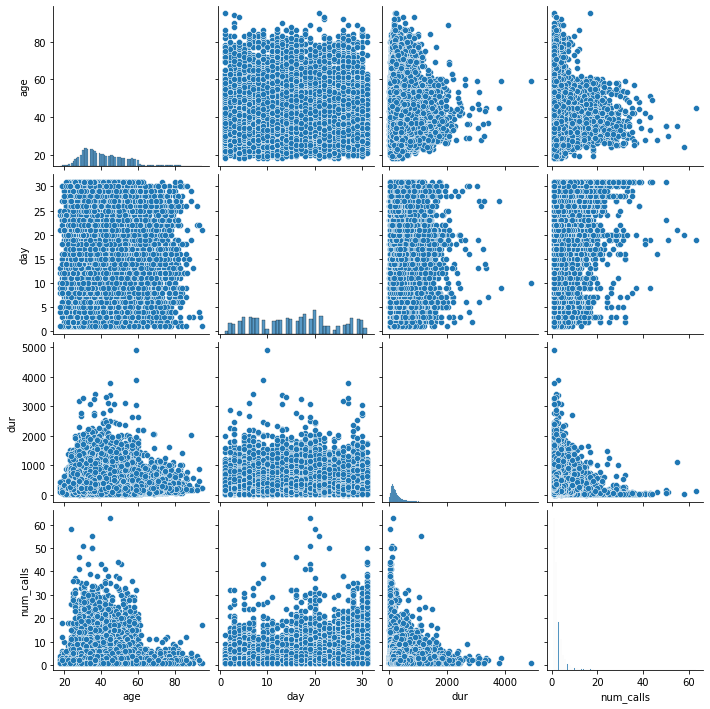

In [ ]:
sns.pairplot(student)

<ipython-input-47-e8c180cf0adf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student['dur'])


<Axes: xlabel='dur', ylabel='Density'>

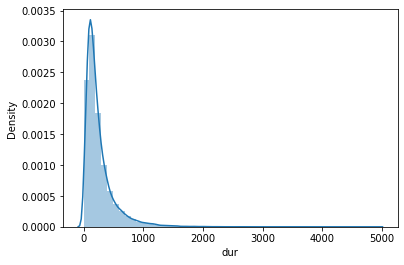

In [ ]:
sns.distplot(student['dur'])

<Axes: xlabel='marital', ylabel='Count'>

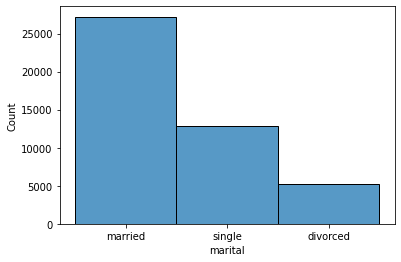

In [ ]:
sns.histplot(student['marital'])

<ipython-input-45-e61d0d9e8b66>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student['day'])


<Axes: xlabel='day', ylabel='Density'>

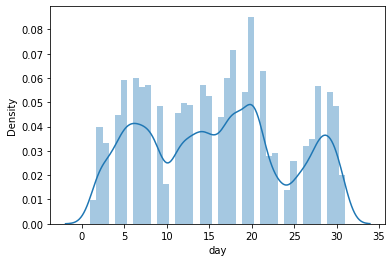

In [ ]:
sns.distplot(student['day'])

<ipython-input-46-2811aec7b765>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student['num_calls'])


<Axes: xlabel='num_calls', ylabel='Density'>

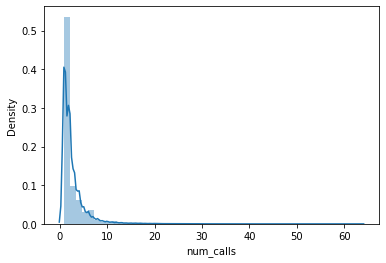

In [ ]:
sns.distplot(student['num_calls'])

In [ ]:
s1 = metrics.mean_absolute_error(y_test, y_pred1)

NameError: ignored